In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# read data from the csv file (from the location it is stored)
Data = pd.read_csv(r'/content/drive/My Drive/IDS_576_Project/wikihowAll.csv')
Data = Data.astype(str)
rows, columns = Data.shape

In [0]:
df=Data[Data['text'].isnull()==False]
df=Data[Data['headline'].isnull()==False]
df=df[df['text']!='nan']

df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates

In [0]:
df

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
215360,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f..."
215361,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...
215362,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...
215363,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr..."


In [0]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
  str = text.lower()
  str = BeautifulSoup(str, "lxml").text
  str = re.sub(r'\([^)]*\)', '', str)
  str = re.sub('"','', str)
  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])    
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str) 
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]
      
  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:          #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [0]:
#call the function
clean_text = []
for t in df['text']:
    clean_text.append(text_cleaner(t,0))

In [0]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(text_cleaner(t,0))

In [0]:
df['text']=clean_text
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Analyzing the sequence distribution

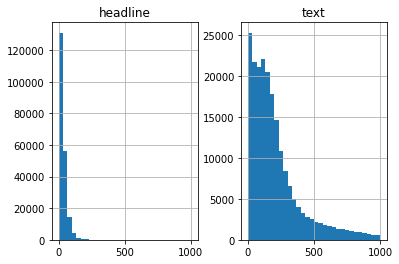

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['text']:
      temp=i.split()
      text_word_count.append(len(temp))

for j in df['headline']:
  #print(j)
  temp1=j.split()
  headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [0]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 50

max_len_text= 150
max_len_headline=50

In [0]:
cnt=0
for i in df['text']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(df['text']))

0.4835318078351504


Selecting text and headlines below the maximum lengths 

In [0]:
text1 =np.array(df['text'])
headline1=np.array(df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [0]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)


In [0]:
print(df['text'][50],df['summary'][50],sep='\n')

guy like every facebook status update instagram picture post better yet frequently comment posts sign wants interact may indicate likes look see comments people posts well comments frequently may reveal avid social media user however rarely likes comments posts sign might feelings publicly comments one photos posts respond eager start conversation way may reveal likes least enjoys messaging example may say great photo could respond saying vancouver last week beautiful city guy met starts liking commenting old photos sig interested means spent time looking back old photos probably wants know better enjoys looking pictures guy likes want connect follow variety different social media platforms example may add facebook snapchat start following twitter instagram adding number social media sites likely sign wants look posts photos selfies attempt get know better
see interacts posts reply comments notice comments old pictures posts check see added multiple social media platforms


**Splitting data into train, test  --  70 - 30**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True) 

In [0]:
print(len(x_train))
print(len(x_test))

59677
25576


Language Translation Model

In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [0]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [0]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [0]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
print(random.choice(pairs))

Reading lines...
Read 59677 sentence pairs
Counting words...
Counted words:
['save hardware later use remove styrofoam lining necessary proper fit grind sand ensure perfect fit'
 'use mug microwave safe suitable drinking handle good shape mug must large enough make brownie make sure mug also hard sturdy glass mug mix wet ingredients together metal spoon break egg yolk pushing breaking yolk gently slowly add dry ingredient mixture stir well combined beating egg yolk adding wet ingredients mixture make brownie light fluffy place mug microwave operate minute seconds bakes puff rise fully cooked remove microwave oven mitts place safe place gets burned mistakenly cool minutes avoid spills brownie cooking place small dish bowl beneath mug helps catch brownie mix leaking microwave floor test brownie ready poke toothpick middle comes dry ready scoop vanilla ice cream sprinkle chocolate sprinkles add chopped walnuts spread marshmallow fluff creative many topping decisions choose go choosing ser

Deep Model

In [0]:
SOS_token = 0
EOS_token = 1

In [0]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
MAX_LENGTH = 150

In [0]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [0]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [0]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [0]:
teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [0]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [0]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]


Training....
1000 / 150001
2m 15s (- 336m 49s) (1000 0%) 5.9627
2000 / 150001
4m 11s (- 309m 36s) (2000 1%) 5.7089
3000 / 150001
6m 10s (- 302m 49s) (3000 2%) 6.0220
4000 / 150001
8m 10s (- 298m 25s) (4000 2%) 5.7237
5000 / 150001
10m 8s (- 294m 9s) (5000 3%) 5.7627
6000 / 150001
12m 9s (- 291m 56s) (6000 4%) 5.8217
7000 / 150001
14m 9s (- 289m 14s) (7000 4%) 5.9252
8000 / 150001
16m 12s (- 287m 45s) (8000 5%) 5.8616
9000 / 150001
18m 13s (- 285m 24s) (9000 6%) 5.7532
10000 / 150001
20m 13s (- 283m 2s) (10000 6%) 5.7008
11000 / 150001
22m 12s (- 280m 41s) (11000 7%) 5.6502
12000 / 150001
24m 11s (- 278m 10s) (12000 8%) 5.5483
13000 / 150001
26m 9s (- 275m 43s) (13000 8%) 5.4885
14000 / 150001
28m 11s (- 273m 48s) (14000 9%) 5.7766
15000 / 150001
30m 12s (- 271m 55s) (15000 10%) 5.6461
16000 / 150001
32m 12s (- 269m 45s) (16000 10%) 5.5710
17000 / 150001
34m 15s (- 268m 1s) (17000 11%) 5.5959
18000 / 150001
36m 15s (- 265m 56s) (18000 12%) 5.5707
19000 / 150001
38m 16s (- 263m 53s) (190

<Figure size 432x288 with 0 Axes>

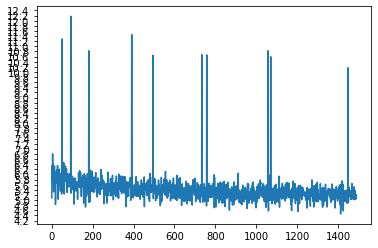

In [47]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 150000, print_every=1000)

In [0]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()    
    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")
          
          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [114]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_GRU=pd.DataFrame()

pred_df_GRU['text']=text
pred_df_GRU['headline']=headline
pred_df_GRU['pred_headline']=pred_headline

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
73.33333333333333 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [0]:
import os
os.chdir ('/content/drive/My Drive/IDS_576_Project')
pred_df_GRU.to_csv('Attention_GRU_Pred.csv',sep='\t',index=False,header=True)

In [0]:
def calculate_rogue(src_trg, pred_trg):
      
  #cut off <eos> token
  pred_trg = pred_trg[:-6]

  
  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']
    
  return rogue_score

In [0]:
attn_plot_threshold = 0.45

def evaluateRandomlyprint_1(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()    

    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
          continue
        else:
          #if(i%1000==0):
           # print(i*100/n,"% complete")
          
          tokenized_input = nltk.word_tokenize(pair[0])
          #print(len(tokenized_input))
          output_words, attentions = evaluate(encoder, decoder, pair[0])

          output_sentence = ' '.join(output_words)

          #get rogue f-score -- need to pass tokenized version here
          #print(pair[0])
          #print(output_sentence)
          score = calculate_rogue(pair[0], output_sentence)
          #if(score>0.25):
           # print(score)

          if score > attn_plot_threshold:
            plot_attention(tokenized_input, output_words, attentions, i)
          
          #print('<', output_sentence)
          #print('')
    #return(text,headline,pred_headline)

In [0]:
#sentence, translation, attention
def plot_attention(sentence, predicted_sentence, attention, i):
  plt.rcParams.update({'font.size': 18})

  fig = plt.figure(figsize=(30,30))

  ax = fig.add_subplot(1,1,1)
  #print(len(attention))  
  ax.matshow(attention, cmap='bone')
  #fig.colorbar(cax)
  #fontdict = {'fontsize': 25}

  #ax.set_xticklabels([''] + sentence.split(' ') +['<EOS>'], rotation=90)
  #ax.set_yticklabels([''] + predicted_sentence)

  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], rotation=90)
  ax.set_yticklabels(['']+predicted_sentence)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
  #xlim(right=3)

  plt.show()
  #plt.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


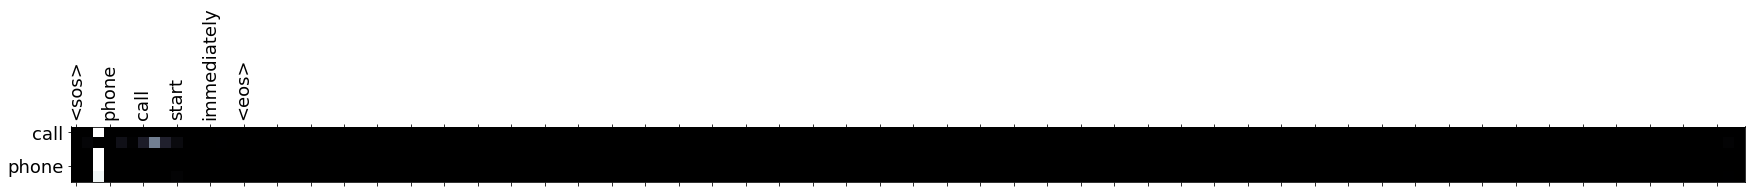

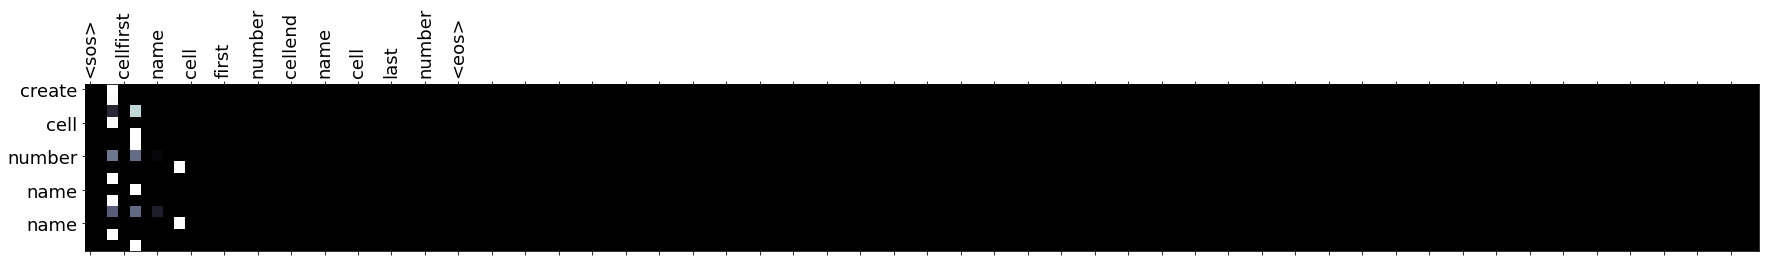

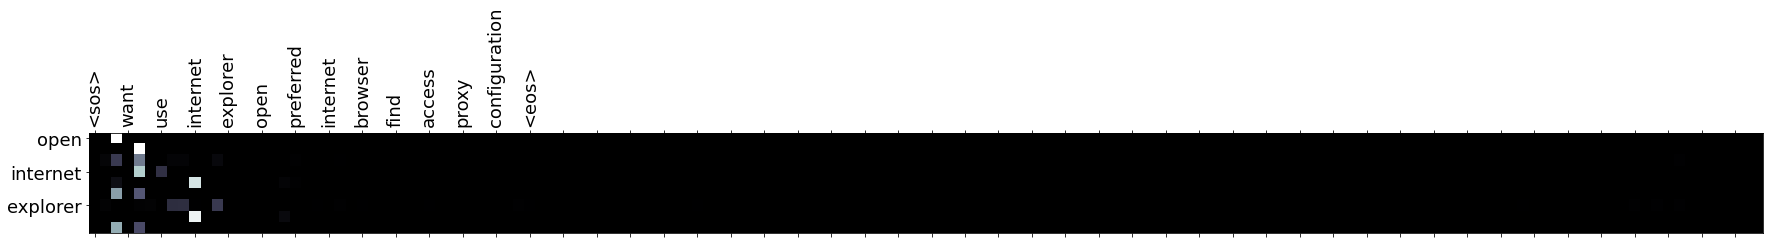

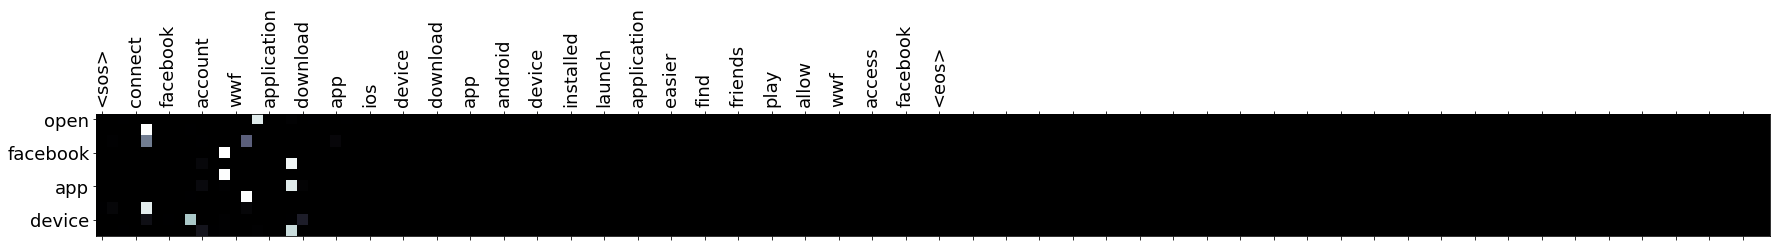

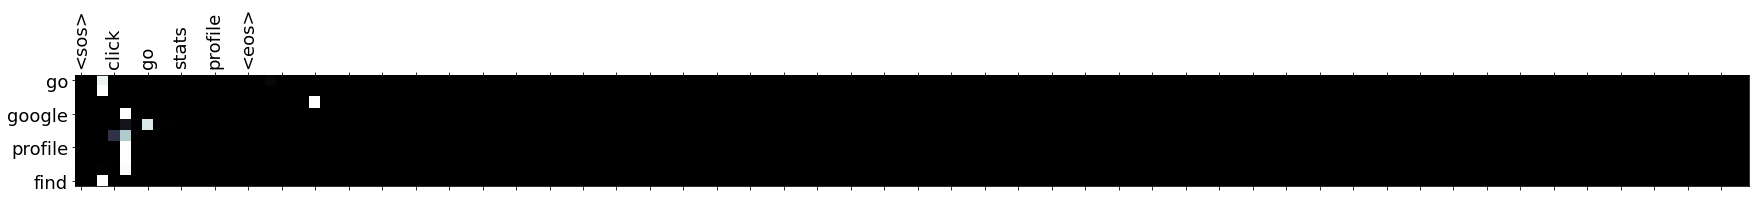

In [259]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()


evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)
#plt.close()